In [220]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import plotly.offline as offline
offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

## World population from 1960 - 2017

In [221]:
df_world_data = pd.read_csv('worldpopulation.csv', skiprows=4, index_col='Country Name')

In [222]:
# Cleaning up dateframe 

df_world_2017 = df_world_data.loc['World',:'2017'] # pull overall world population of 1960 - 2017
df_world_2017.to_frame()
df_world_2017 = df_world_2017.drop(df_world_2017.index[:3]) # Remove unwanted rows
df_world_2017 = df_world_2017.reset_index()
df_world_2017.columns = ['year', 'total population'] # rename columns
divide = df_world_2017['total population'] / 1000000000 # divdie to ploting later on
df_world_2017['divide'] = divide

In [223]:
df_birthrate = pd.read_csv('Countrybirthrate.csv', skiprows=4, index_col='Country Name')

In [224]:
# Cleaning up dateframe 

df_birthrate_2017 = df_birthrate.loc['World',:'2017'] # pull overall world birthrate of 1960 - 2017
df_birthrate_2017.to_frame()
df_birthrate_2017 = df_birthrate_2017.drop(df_birthrate_2017.index[:3]) # Remove unwanted rows
df_birthrate_2017 = df_birthrate_2017.reset_index()
df_birthrate_2017.columns = ['year', 'birthrate'] # rename columns

In [225]:
df_aging = pd.read_csv('Aging poplution.csv', skiprows=4, index_col='Country Name')

In [226]:
# Cleaning up dateframe

df_aging_2017 = df_aging.loc['World',:'2017'] # pull overall world aging of 1960 - 2017
df_aging_2017 = df_aging_2017.to_frame()
df_aging_2017 = df_aging_2017.drop(df_aging_2017.index[:3]) # Remove unwanted rows
df_aging_2017 = df_aging_2017.reset_index()
df_aging_2017.columns = ['year', 'Aging'] # rename columns

In [227]:
# ploting

population_2017 = go.Scatter(
    
    x = df_world_2017['year'],
    y = df_world_2017['divide'],
    
    name = 'Total Population(Billion)',
    
    line = dict(color = 'red',
                width = 1),
    
    connectgaps = True
)

birth_2017 = go.Scatter(
    
    x = df_birthrate_2017['year'],
    y = df_birthrate_2017['birthrate'],
    
    name = 'Total Birth(Per Women)',
    
    line = dict(color = 'green',
                width = 1),
    
    connectgaps = True
)

Aging_2017 = go.Scatter(
    
    x = df_aging_2017['year'],
    y = df_aging_2017['Aging'],
    
    name = 'Age above 65(%)',
    
    line = dict(color = 'blue',
                width = 1),
    
    connectgaps = True
)

data = [population_2017, birth_2017, Aging_2017]

layout = dict(title = 'Population Overall View 2017',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = ''),
            width=1100,
            height=500
              )

fig = dict(data=data, layout=layout)

offline.iplot(fig)

## Merge dateset

In [228]:
# Merge dataset
df_all = pd.merge(pd.merge(df_world_data, df_aging, on='Country Code', how='left'),df_birthrate, on='Country Code', how='left')
df_all.set_index(df_world_data.index,inplace=True)

In [254]:
# Pull 2017 data out
df_all_2017 = df_all.loc[:, ['2017_x','2017_y','2017']]
df_all_2017.columns = ['2017 Population', '2017 Aging %','2017']
df_all_2017['Country Code'] = df_world_data['Country Code']

In [230]:
df_income = pd.read_csv('Country_income.csv', index_col='Country Code')
df_income = df_income.reset_index()

In [231]:
# Merge dateset and keep useful data
df_all_with_income_2017 = pd.merge(df_all_2017, df_income, on='Country Code', how='left')
df_all_with_income_2017.set_index(df_all_2017.index,inplace=True)
df_all_with_income_2017 = df_all_with_income_2017.drop(['Unnamed: 5', 'SpecialNotes', 'Region', 'TableName' ], axis = 1)
df_all_with_income_2017 = df_all_with_income_2017.dropna()
df_all_with_income_2017 = df_all_with_income_2017.reset_index()

In [232]:
df_migration_population = pd.read_csv('migration_population.csv', index_col='country')


In [233]:
# keep useful data
df_migration = df_migration_population.dropna(subset=['capitalCity'])
df_migration = df_migration.loc[:, ['year','net_migration','migration_perc', 'iso3c']]
df_migration = df_migration.rename(columns={'iso3c': 'Country Code'})
df_mirgration_2017 = df_migration.loc[df_migration['year'] == 2017]

In [234]:
# Merge dataset and keep useful data
df_overall_2017 = pd.merge(df_all_with_income_2017,df_mirgration_2017, on='Country Code', how='left')
df_overall_2017.set_index(df_all_with_income_2017.index,inplace=True)
df_overall_2017 = df_overall_2017.drop(columns=['year'])
df_overall_2017.drop(df_overall_2017.index[df_overall_2017['net_migration'] == 0], inplace=True)
df_overall_2017 = df_overall_2017.dropna()
df_overall_2017 = df_overall_2017.rename(columns={'2017' : 'BirthRate 2017'})

## Relationship between population/birthrate/aging/mirgration and country incomegroup

In [235]:
# Function for ploting scatter plot
def ploting_scatter (dateframe, x , y , color, symbol, hover_name, title):
        dateframe = px.scatter(dateframe, x= x , y= y , color = color,
                 symbol= symbol, hover_name= hover_name)
        dateframe.update_layout(title=title, yaxis = dict(tickfont = dict(size=15)))
        dateframe.show()         

In [236]:
fig1 = ploting_scatter(df_overall_2017,'2017 Population','net_migration','IncomeGroup','IncomeGroup',
                        'Country Name','Population Vs Migration 2017')

In [237]:
fig2 = ploting_scatter(df_overall_2017,'net_migration','BirthRate 2017','IncomeGroup','IncomeGroup',
                        'Country Name','Migration Vs Birth Rate 2017')

In [238]:
fig3 = ploting_scatter(df_overall_2017,'net_migration','2017 Aging %','IncomeGroup','IncomeGroup',
                        'Country Name','Migration Vs Aging 2017')

## Find Singapore rating

In [239]:
# sorting function based on dateset
def sorting(dateframe,columnname,countryname,sortmethod):
    dateframe = dateframe.sort_values(sortmethod, ascending= False)
    dateframe = dateframe.reset_index()
    dateframe = dateframe.loc[dateframe[columnname] == countryname]
    print(dateframe)

In [240]:
# Find singapore population rating
sorting(df_overall_2017,'Country Name', 'Singapore', '2017 Population')

     index Country Name  2017 Population  2017 Aging %  BirthRate 2017  \
110    152    Singapore        5612253.0     10.579899            1.16   

    Country Code  IncomeGroup  net_migration  migration_perc  
110          SGP  High income       135142.0         0.02408  


In [241]:
# Find singapore birth-rate rating
sorting(df_overall_2017,'Country Name', 'Singapore', 'BirthRate 2017')

     index Country Name  2017 Population  2017 Aging %  BirthRate 2017  \
180    152    Singapore        5612253.0     10.579899            1.16   

    Country Code  IncomeGroup  net_migration  migration_perc  
180          SGP  High income       135142.0         0.02408  


In [242]:
# Find singapore migration rating
sorting(df_overall_2017,'Country Name', 'Singapore', 'net_migration')

    index Country Name  2017 Population  2017 Aging %  BirthRate 2017  \
31    152    Singapore        5612253.0     10.579899            1.16   

   Country Code  IncomeGroup  net_migration  migration_perc  
31          SGP  High income       135142.0         0.02408  


In [243]:
# Find singapore aging rating
sorting(df_overall_2017,'Country Name', 'Singapore', '2017 Aging %')

    index Country Name  2017 Population  2017 Aging %  BirthRate 2017  \
58    152    Singapore        5612253.0     10.579899            1.16   

   Country Code  IncomeGroup  net_migration  migration_perc  
58          SGP  High income       135142.0         0.02408  


## Other factor that affect migration
## Focus on freedom status

In [244]:
df_otherfactor = pd.read_csv('otherfactor.csv')
df_withotherfactor = pd.merge(df_otherfactor,df_overall_2017, on='Country Name', how='left')

In [245]:
# Clean up dataset and pull out data based on column 'freedom status'

df_freedom_2017 = df_withotherfactor.loc[:,['Country Name','Subindicator Type','2017','2017 Population','2017 Aging %','BirthRate 2017','IncomeGroup','net_migration','migration_perc']]
df_freedom_2017 = df_freedom_2017.loc[df_otherfactor['Indicator'] == 'Freedom Status']
df_freedom_2017 = df_freedom_2017.dropna()
df_freedom_2017 = df_freedom_2017.rename(columns={'2017':'Freedom Status'})

In [246]:
# Find the sum of migration based on incomegroup and freedom status
# Make it a double index 

df_byfreedom = df_freedom_2017.groupby(by=['IncomeGroup','Freedom Status']).agg({'net_migration':['sum']})
df_byfreedom = df_byfreedom.sort_values(by = 'IncomeGroup', ascending= True )

<AxesSubplot:xlabel='IncomeGroup'>

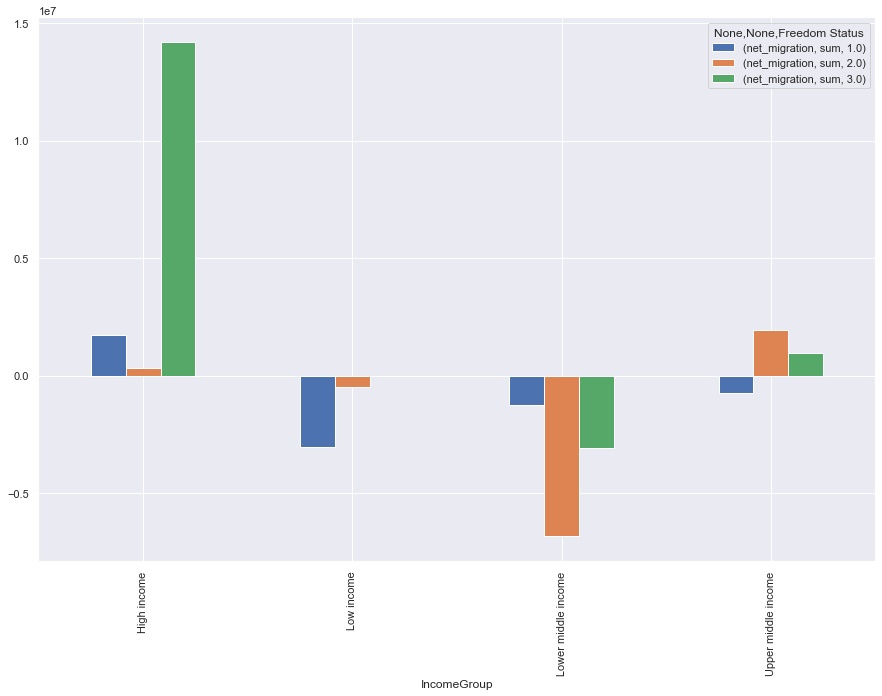

In [247]:
# plot fig 6

fig6 = df_byfreedom.unstack().plot(kind='bar', stacked=False, figsize=(15,10))
fig6

## Plot for Singapore population overview 2017

In [248]:
# Pull singapore data for plotting

Singapore_p = df_world_data.loc['Singapore',:'2017'] # pull data of 1960 - 2017
Singapore_p.to_frame()
Singapore_p = Singapore_p.drop(Singapore_p.index[:3]) # Remove unwanted rows
Singapore_p = Singapore_p.reset_index()
Singapore_p.columns = ['year', 'total population'] # rename columns
divide_1 = Singapore_p['total population'] / 1000000 # divdie to ploting later on
Singapore_p['divide_1'] = divide_1

Singapore_b = df_birthrate.loc['Singapore',:'2017'] # pull data of 1960 - 2017
Singapore_b.to_frame()
Singapore_b = Singapore_b.drop(Singapore_b.index[:3]) # Remove unwanted rows
Singapore_b = Singapore_b.reset_index()
Singapore_b.columns = ['year', 'birthrate'] # rename columns

Singapore_a = df_aging.loc['World',:'2017'] # pull data of 1960 - 2017
Singapore_a = Singapore_a.to_frame()
Singapore_a = Singapore_a.drop(Singapore_a.index[:3]) # Remove unwanted rows
Singapore_a = Singapore_a.reset_index()
Singapore_a.columns = ['year', 'Aging'] # rename columns

migration_sg = df_migration.reset_index()
migration_sg = migration_sg.loc[migration_sg['country'] == 'Singapore']
migration_sg = migration_sg.dropna()
divide_2 = migration_sg['net_migration'] / 100000 # divdie to ploting later on
migration_sg ['divide_2'] = divide_2

In [249]:
Singapore_population = go.Scatter(
    
    x = Singapore_p['year'],
    y = Singapore_p['divide_1'],
    
    name = 'Total Population(Million)',
    
    line = dict(color = 'red',
                width = 1),
    
    connectgaps = True
)

Singapre_birth = go.Scatter(
    
    x = Singapore_b['year'],
    y = Singapore_b['birthrate'],
    
    name = 'Total Birth(Per Women)',
    
    line = dict(color = 'green',
                width = 1),
    
    connectgaps = True
)

Singapore_aging = go.Scatter(
    
    x = Singapore_a['year'],
    y = Singapore_a['Aging'],
    
    name = 'Age above 65(%)',
    
    line = dict(color = 'blue',
                width = 1),
    
    connectgaps = True
)

Singapore_migration = go.Scatter(
    
    x = migration_sg['year'],
    y = migration_sg['divide_2'],
    
    name = 'Migration (100k) ',
    
    line = dict(color = 'blue',
                width = 1),
    
    connectgaps = True

)

data1 = [Singapore_population, Singapre_birth, Singapore_aging, Singapore_migration]

layout1 = dict(title = 'Singapore Population 2017',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = ''),
            width=1200,
            height=500
              )

fig_sg = dict(data=data1, layout=layout1)

offline.iplot(fig_sg)

## Add plot to chart studio

In [250]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [251]:
username = ''
api_key = ''

In [252]:
tls.set_credentials_file(username =username, api_key = api_key)

In [253]:
py.plot(fig_sg, filename ='', auto_open = False)

'https://plotly.com/~boonkiat1989/23/'